In [133]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np

df = pd.read_csv('/home/mabelchaguer/Desktop/nettoyage_de_donnees/appartements.csv')
data = { "Column Name" : df.columns, 
         "Description" : [
        "Title of the listing, providing a brief description of the property.",
        "City where the property is located.",
        "Rental price for the property; can specify monthly or nightly rates.",
        "Number of bedrooms in the property.",
        "Number of bathrooms in the property.",
        "Habitable surface area of the property in square meters.",
        "Type of property and rental status.",
        "Specific area or neighborhood within the city.",
        "Number of living rooms in the property.",
        "Floor on which the property is located.",
        "Age of the property.",
        "Link to the online listing for additional details."
    ],
         "type data": df.dtypes.values }
data = pd.DataFrame(data)
data.head(12)

,Column Name,Description,type data
0,Titre_appart,"Title of the listing, providing a brief descri...",object
1,Localisation_appart,City where the property is located.,object
2,Prix_appart,Rental price for the property; can specify mon...,object
3,N_chambre,Number of bedrooms in the property.,object
4,N_douches,Number of bathrooms in the property.,object
5,Surface_habitable,Habitable surface area of the property in squa...,float64
6,Type,Type of property and rental status.,object
7,Secteur,Specific area or neighborhood within the city.,object
8,Salons,Number of living rooms in the property.,float64
9,Étage,Floor on which the property is located.,object


In [134]:
df

,Titre_appart,Localisation_appart,Prix_appart,N_chambre,N_douches,Surface_habitable,Type,Secteur,Salons,Étage,Âge_du_bien,Link_appart
0,Appartement à louer sur Souissi Orangeraie,Rabat,11 000 DH,1,1,70.0,"Appartements, à louer",Souissi,1.0,2,NaN,https://www.avito.ma/fr/souissi/appartements/A...
1,Appartement meublé à louer sur l'Agdal,Rabat,9 500 DH,2,2,100.0,"Appartements, à louer",Agdal,1.0,3,NaN,https://www.avito.ma/fr/agdal/appartements/App...
2,appartement a louer par jour,Fès,300 DH /Nuit,5,2,NaN,"Locations de vacances, à louer",Autre secteur,NaN,NaN,NaN,https://www.avito.ma/fr/autre_secteur/location...
3,Appartement au Taghazout Bay,Taghazout,PRIX NON SPÉCIFIÉ,2,Appartements,NaN,"Locations de vacances, à louer",Toute la ville,NaN,NaN,NaN,https://www.avito.ma/fr/taghazout/locations_de...
4,Appartement de 112 m2 Agdal,Fès,250 DH /Nuit,Appartements,NaN,NaN,"Locations de vacances, à louer",Agdal,NaN,NaN,NaN,https://www.avito.ma/fr/agdal/locations_de_vac...
...,...,...,...,...,...,...,...,...,...,...,...,...
1658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://immoneuf.avito.ma/fr/unite/jst?utm_sou...
1659,Appartement à vendre 63 m² à Marrakech,Marrakech,756 000 DH,2,2,63.0,"Appartements, à vendre",Route de Casablanca,1.0,2,Neuf,https://www.avito.ma/fr/route_de_casablanca/ap...
1660,Appartement à vendre 97 m² à Dar Bouazza,Dar Bouazza,2 400 000 DH,2,2,97.0,"Appartements, à vendre",Toute la ville,1.0,2,Neuf,https://www.avito.ma/fr/dar_bouazza/appartemen...
1661,Appartement spacieux 151 m² à vendre,Fès,690 000 DH,3,2,151.0,"Appartements, à vendre",Narjis,2.0,4,11-20 ans,https://www.avito.ma/fr/narjis/appartements/Ap...


In [135]:
df = df[df['Titre_appart'].notna()]

In [136]:
df.loc[:, 'Prix_appart'] = df['Prix_appart'].replace('PRIX NON SPÉCIFIÉ', 'NaN')
df.loc[:, 'Prix_appart'] = df['Prix_appart'].str.replace(r'\D+', '', regex=True)
df.loc[:, 'N_chambre'] = df['N_chambre'].replace('Appartements', np.nan)
df.loc[:, 'N_chambre'] = df['N_chambre'].str.replace('+', '', regex=False)
df.loc[:, 'N_douches'] = df['N_douches'].replace('Appartements', np.nan)
df.loc[:, 'Localisation_appart'] = df['Localisation_appart'].replace('مراكش', 'Marrakech')
df.loc[:, 'Localisation_appart'] = df['Localisation_appart'].replace('أكادير', 'Agadir')
df.loc[:, 'Localisation_appart'] = df['Localisation_appart'].replace('الدار البيضاء', 'Casablanca')
df.loc[:, 'Localisation_appart'] = df['Localisation_appart'].replace('الرباط', 'Rabat')
df.loc[:, 'Localisation_appart'] = df['Localisation_appart'].replace('طنجة', 'Tanger')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 0 to 1661
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titre_appart         1305 non-null   object 
 1   Localisation_appart  1305 non-null   object 
 2   Prix_appart          1305 non-null   object 
 3   N_chambre            1303 non-null   object 
 4   N_douches            1277 non-null   object 
 5   Surface_habitable    1275 non-null   float64
 6   Type                 1305 non-null   object 
 7   Secteur              1305 non-null   object 
 8   Salons               1199 non-null   float64
 9   Étage                1293 non-null   object 
 10  Âge_du_bien          1017 non-null   object 
 11  Link_appart          1305 non-null   object 
dtypes: float64(2), object(10)
memory usage: 132.5+ KB


In [138]:
df['Prix_appart'] = pd.to_numeric(df['Prix_appart'], errors='coerce')
df['N_chambre'] = pd.to_numeric(df['N_chambre'], errors='coerce')
df['N_douches'] = pd.to_numeric(df['N_douches'], errors='coerce')
df['Étage'] = pd.to_numeric(df['Étage'], errors='coerce')

/tmp/ipykernel_6282/1737708469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prix_appart'] = pd.to_numeric(df['Prix_appart'], errors='coerce')
/tmp/ipykernel_6282/1737708469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['N_chambre'] = pd.to_numeric(df['N_chambre'], errors='coerce')
/tmp/ipykernel_6282/1737708469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 0 to 1661
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titre_appart         1305 non-null   object 
 1   Localisation_appart  1305 non-null   object 
 2   Prix_appart          1101 non-null   float64
 3   N_chambre            1303 non-null   float64
 4   N_douches            1277 non-null   float64
 5   Surface_habitable    1275 non-null   float64
 6   Type                 1305 non-null   object 
 7   Secteur              1305 non-null   object 
 8   Salons               1199 non-null   float64
 9   Étage                1191 non-null   float64
 10  Âge_du_bien          1017 non-null   object 
 11  Link_appart          1305 non-null   object 
dtypes: float64(6), object(6)
memory usage: 132.5+ KB


In [140]:
df

,Titre_appart,Localisation_appart,Prix_appart,N_chambre,N_douches,Surface_habitable,Type,Secteur,Salons,Étage,Âge_du_bien,Link_appart
0,Appartement à louer sur Souissi Orangeraie,Rabat,11000.0,1.0,1.0,70.0,"Appartements, à louer",Souissi,1.0,2.0,NaN,https://www.avito.ma/fr/souissi/appartements/A...
1,Appartement meublé à louer sur l'Agdal,Rabat,9500.0,2.0,2.0,100.0,"Appartements, à louer",Agdal,1.0,3.0,NaN,https://www.avito.ma/fr/agdal/appartements/App...
2,appartement a louer par jour,Fès,300.0,5.0,2.0,NaN,"Locations de vacances, à louer",Autre secteur,NaN,NaN,NaN,https://www.avito.ma/fr/autre_secteur/location...
3,Appartement au Taghazout Bay,Taghazout,NaN,2.0,NaN,NaN,"Locations de vacances, à louer",Toute la ville,NaN,NaN,NaN,https://www.avito.ma/fr/taghazout/locations_de...
4,Appartement de 112 m2 Agdal,Fès,250.0,NaN,NaN,NaN,"Locations de vacances, à louer",Agdal,NaN,NaN,NaN,https://www.avito.ma/fr/agdal/locations_de_vac...
...,...,...,...,...,...,...,...,...,...,...,...,...
1656,Appart 3 chambres 3 SDB face ville verte ODYSSIA,Casablanca,1280000.0,3.0,3.0,132.0,"Appartements, à vendre",Sidi Maarouf,1.0,2.0,Neuf,https://www.avito.ma/fr/sidi_maarouf/apparteme...
1657,Appartement à vendre,Casablanca,NaN,2.0,2.0,89.0,"Appartements, à vendre",Sidi Bernoussi,2.0,1.0,11-20 ans,https://www.avito.ma/fr/sidi_bernoussi/apparte...
1659,Appartement à vendre 63 m² à Marrakech,Marrakech,756000.0,2.0,2.0,63.0,"Appartements, à vendre",Route de Casablanca,1.0,2.0,Neuf,https://www.avito.ma/fr/route_de_casablanca/ap...
1660,Appartement à vendre 97 m² à Dar Bouazza,Dar Bouazza,2400000.0,2.0,2.0,97.0,"Appartements, à vendre",Toute la ville,1.0,2.0,Neuf,https://www.avito.ma/fr/dar_bouazza/appartemen...


In [141]:
# Calculate descriptive statistics
descriptive_stats = df.describe().loc[['mean', '50%', 'std']]
descriptive_stats.rename(index={'50%': 'median'}, inplace=True)
dff = df.select_dtypes(include=['number'])
skewness = dff.skew()
descriptive_stats.loc['skew'] = skewness
descriptive_stats

,Prix_appart,N_chambre,N_douches,Surface_habitable,Salons,Étage
mean,1.128520e+06,2.377590,1.787001,99.847059,1.271059,2.472712
median,8.700000e+05,2.000000,2.000000,90.000000,1.000000,2.000000
std,1.200767e+06,0.741685,3.440500,88.282136,0.514324,1.377753
skew,6.386146e+00,2.195584,20.682537,16.520330,1.373034,0.938489


In [142]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Supposons que votre DataFrame s'appelle 'df'

# for column in descriptive_stats.columns:
#     plt.figure(figsize=(12, 6))
#     sns.histplot(df[column], kde=True, color='skyblue')

#     mean = df[column].mean()
#     median = df[column].median()
#     mode = df[column].mode().values[0]  

#     plt.axvline(x=mean, color='red', linestyle='--', label='Moyenne')
#     plt.axvline(x=median, color='green', linestyle='--', label='Médiane')
#     plt.axvline(x=mode, color='blue', linestyle='--', label='Mode')

#     skewness = df[column].skew()
#     if skewness < -1:
#         plt.title(f"{column} (Asymétrie négative)")
#     elif skewness > 1:
#         plt.title(f"{column} (Asymétrie positive)")
#     else:
#         plt.title(f"{column} (Asymétrie approximativement nulle)")

#     plt.legend()
#     plt.xlabel(column)
#     plt.ylabel('Fréquence')
#     plt.grid(True)
#     plt.show()

In [143]:
# descriptive_stats
a = df[df['Âge_du_bien'].isnull()]
a.shape

(288, 12)

In [144]:
missing_percentage = df.isnull().mean() * 100
print("Pourcentage de valeurs manquantes par colonne :")
missing_percentage

Pourcentage de valeurs manquantes par colonne :


Titre_appart            0.000000
Localisation_appart     0.000000
Prix_appart            15.632184
N_chambre               0.153257
N_douches               2.145594
Surface_habitable       2.298851
Type                    0.000000
Secteur                 0.000000
Salons                  8.122605
Étage                   8.735632
Âge_du_bien            22.068966
Link_appart             0.000000
dtype: float64

In [145]:
from sklearn.impute import KNNImputer

# Initialize the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer on specific columns with .loc for explicit assignment
df.loc[:, ['Prix_appart']] = knn_imputer.fit_transform(df[['Prix_appart']])

# Use .loc to assign filled values to each column explicitly
df.loc[:, 'Surface_habitable'] = df['Surface_habitable'].fillna(df['Surface_habitable'].mean())
df.loc[:, 'N_chambre'] = df['N_chambre'].fillna(df['N_chambre'].median())
df.loc[:, 'N_douches'] = df['N_douches'].fillna(df['N_douches'].median())
df.loc[:, 'Salons'] = df['Salons'].fillna(df['Salons'].mode()[0])
df.loc[:, 'Étage'] = df['Étage'].fillna(df['Étage'].mode()[0])

# Calculate missing values after imputation
missing_after_imputation = df.isnull().mean() * 100
print("\nPourcentage de valeurs manquantes après imputation :")
print(missing_after_imputation)



Pourcentage de valeurs manquantes après imputation :
Titre_appart            0.000000
Localisation_appart     0.000000
Prix_appart             0.000000
N_chambre               0.000000
N_douches               0.000000
Surface_habitable       0.000000
Type                    0.000000
Secteur                 0.000000
Salons                  0.000000
Étage                   0.000000
Âge_du_bien            22.068966
Link_appart             0.000000
dtype: float64


In [146]:
df

,Titre_appart,Localisation_appart,Prix_appart,N_chambre,N_douches,Surface_habitable,Type,Secteur,Salons,Étage,Âge_du_bien,Link_appart
0,Appartement à louer sur Souissi Orangeraie,Rabat,1.100000e+04,1.0,1.0,70.000000,"Appartements, à louer",Souissi,1.0,2.0,NaN,https://www.avito.ma/fr/souissi/appartements/A...
1,Appartement meublé à louer sur l'Agdal,Rabat,9.500000e+03,2.0,2.0,100.000000,"Appartements, à louer",Agdal,1.0,3.0,NaN,https://www.avito.ma/fr/agdal/appartements/App...
2,appartement a louer par jour,Fès,3.000000e+02,5.0,2.0,99.847059,"Locations de vacances, à louer",Autre secteur,1.0,1.0,NaN,https://www.avito.ma/fr/autre_secteur/location...
3,Appartement au Taghazout Bay,Taghazout,1.128520e+06,2.0,2.0,99.847059,"Locations de vacances, à louer",Toute la ville,1.0,1.0,NaN,https://www.avito.ma/fr/taghazout/locations_de...
4,Appartement de 112 m2 Agdal,Fès,2.500000e+02,2.0,2.0,99.847059,"Locations de vacances, à louer",Agdal,1.0,1.0,NaN,https://www.avito.ma/fr/agdal/locations_de_vac...
...,...,...,...,...,...,...,...,...,...,...,...,...
1656,Appart 3 chambres 3 SDB face ville verte ODYSSIA,Casablanca,1.280000e+06,3.0,3.0,132.000000,"Appartements, à vendre",Sidi Maarouf,1.0,2.0,Neuf,https://www.avito.ma/fr/sidi_maarouf/apparteme...
1657,Appartement à vendre,Casablanca,1.128520e+06,2.0,2.0,89.000000,"Appartements, à vendre",Sidi Bernoussi,2.0,1.0,11-20 ans,https://www.avito.ma/fr/sidi_bernoussi/apparte...
1659,Appartement à vendre 63 m² à Marrakech,Marrakech,7.560000e+05,2.0,2.0,63.000000,"Appartements, à vendre",Route de Casablanca,1.0,2.0,Neuf,https://www.avito.ma/fr/route_de_casablanca/ap...
1660,Appartement à vendre 97 m² à Dar Bouazza,Dar Bouazza,2.400000e+06,2.0,2.0,97.000000,"Appartements, à vendre",Toute la ville,1.0,2.0,Neuf,https://www.avito.ma/fr/dar_bouazza/appartemen...


In [147]:
numeric_df = df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
outliers = numeric_df[((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected:")
outliers

Outliers detected:


,Prix_appart,N_chambre,N_douches,Surface_habitable,Salons,Étage
2,3.000000e+02,5.0,2.0,99.847059,1.0,1.0
6,5.500000e+03,2.0,2.0,100.000000,2.0,4.0
9,3.000000e+02,5.0,3.0,99.847059,1.0,1.0
11,1.300000e+06,3.0,1.0,185.000000,1.0,8.0
16,1.128520e+06,5.0,2.0,99.847059,1.0,1.0
...,...,...,...,...,...,...
1647,1.128520e+06,2.0,2.0,120.000000,2.0,3.0
1652,8.600000e+05,2.0,2.0,86.000000,2.0,2.0
1657,1.128520e+06,2.0,2.0,89.000000,2.0,1.0
1660,2.400000e+06,2.0,2.0,97.000000,1.0,2.0


In [148]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_df)
normalized_data = pd.DataFrame(normalized_data)
normalized_data

,0,1,2,3,4,5
0,0.000611,0.000000,0.012048,0.034517,0.25,0.142857
1,0.000527,0.111111,0.024096,0.049525,0.25,0.285714
2,0.000016,0.444444,0.024096,0.049448,0.25,0.000000
3,0.062695,0.111111,0.024096,0.049448,0.25,0.000000
4,0.000014,0.111111,0.024096,0.049448,0.25,0.000000
...,...,...,...,...,...,...
1300,0.071111,0.222222,0.036145,0.065533,0.25,0.142857
1301,0.062695,0.111111,0.024096,0.044022,0.50,0.000000
1302,0.042000,0.111111,0.024096,0.031016,0.25,0.142857
1303,0.133333,0.111111,0.024096,0.048024,0.25,0.142857


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 0 to 1661
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Titre_appart         1305 non-null   object 
 1   Localisation_appart  1305 non-null   object 
 2   Prix_appart          1305 non-null   float64
 3   N_chambre            1305 non-null   float64
 4   N_douches            1305 non-null   float64
 5   Surface_habitable    1305 non-null   float64
 6   Type                 1305 non-null   object 
 7   Secteur              1305 non-null   object 
 8   Salons               1305 non-null   float64
 9   Étage                1305 non-null   float64
 10  Âge_du_bien          1017 non-null   object 
 11  Link_appart          1305 non-null   object 
dtypes: float64(6), object(6)
memory usage: 132.5+ KB


In [150]:
df.head()

,Titre_appart,Localisation_appart,Prix_appart,N_chambre,N_douches,Surface_habitable,Type,Secteur,Salons,Étage,Âge_du_bien,Link_appart
0,Appartement à louer sur Souissi Orangeraie,Rabat,1.100000e+04,1.0,1.0,70.000000,"Appartements, à louer",Souissi,1.0,2.0,NaN,https://www.avito.ma/fr/souissi/appartements/A...
1,Appartement meublé à louer sur l'Agdal,Rabat,9.500000e+03,2.0,2.0,100.000000,"Appartements, à louer",Agdal,1.0,3.0,NaN,https://www.avito.ma/fr/agdal/appartements/App...
2,appartement a louer par jour,Fès,3.000000e+02,5.0,2.0,99.847059,"Locations de vacances, à louer",Autre secteur,1.0,1.0,NaN,https://www.avito.ma/fr/autre_secteur/location...
3,Appartement au Taghazout Bay,Taghazout,1.128520e+06,2.0,2.0,99.847059,"Locations de vacances, à louer",Toute la ville,1.0,1.0,NaN,https://www.avito.ma/fr/taghazout/locations_de...
4,Appartement de 112 m2 Agdal,Fès,2.500000e+02,2.0,2.0,99.847059,"Locations de vacances, à louer",Agdal,1.0,1.0,NaN,https://www.avito.ma/fr/agdal/locations_de_vac...


In [151]:
df['Type'].unique()

array(['Appartements, à louer', 'Locations de vacances, à louer',
       'Appartements, à vendre', 'Autre Matériel professionel, à vendre',
       'Colocations, à louer'], dtype=object)

In [154]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [153]:
from imblearn.over_sampling import RandomOverSampler

label_encoder = LabelEncoder()
df.loc[:, 'Type_code'] = label_encoder.fit_transform(df['Type'])


X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Type_code', axis=1), df['Type_code'], test_size=0.2, random_state=42
) 
# smt = SMOTE(random_state=42, k_neighbors=1)  # or set k_neighbors to a value that fits your dataset
# X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

ros = RandomOverSampler(random_state=42)
X_train_sm, y_train_sm = ros.fit_resample(X_train, y_train)

df_train_sm = pd.DataFrame(X_train_sm, columns=X_train.columns)
df_train_sm['Type_code'] = y_train_sm
df_train_sm

/tmp/ipykernel_6282/1030393561.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Type_code'] = label_encoder.fit_transform(df['Type'])


,Titre_appart,Localisation_appart,Prix_appart,N_chambre,N_douches,Surface_habitable,Type,Secteur,Salons,Étage,Âge_du_bien,Link_appart,Type_code
0,vente appartement,Meknès,5.400000e+05,3.0,3.0,108.000000,"Appartements, à vendre",Sidi Said,2.0,3.0,1-5 ans,https://www.avito.ma/fr/sidi_said/appartements...,1
1,Apt Spacieux Ensoleillé Sécurisé Mosquée Hdj F...,Casablanca,9.500000e+05,2.0,2.0,102.000000,"Appartements, à vendre",Hay Hassani,2.0,2.0,NaN,https://www.avito.ma/fr/hay_hassani/appartemen...,1
2,Appartement meublé 100 m² sur Oulfa,Casablanca,4.000000e+03,2.0,1.0,100.000000,"Appartements, à louer",Oulfa,1.0,3.0,NaN,https://www.avito.ma/fr/oulfa/appartements/App...,0
3,Appartement à vendre 130 m² à Temara,Temara,2.650000e+06,2.0,3.0,130.000000,"Appartements, à vendre",Riad Oulad Mtaa,2.0,1.0,11-20 ans,https://www.avito.ma/fr/riad_oulad_mtaa/appart...,1
4,appartement à ABRAJ ALFIDA,Casablanca,6.900000e+05,2.0,1.0,70.000000,"Appartements, à vendre",Al Fida,1.0,6.0,1-5 ans,https://www.avito.ma/fr/al_fida/appartements/a...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5090,Maison et Villas location de vacances à El Jadida,El Jadida,2.500000e+02,5.0,2.0,99.847059,"Locations de vacances, à louer",Autre secteur,1.0,1.0,NaN,https://www.avito.ma/fr/autre_secteur/location...,4
5091,Appartement en location journalière maarif,Casablanca,5.800000e+02,2.0,1.0,99.847059,"Locations de vacances, à louer",Maarif,1.0,1.0,NaN,https://www.avito.ma/fr/maarif/locations_de_va...,4
5092,Maison et Villas location de vacances à El Jadida,El Jadida,2.500000e+02,5.0,2.0,99.847059,"Locations de vacances, à louer",Autre secteur,1.0,1.0,NaN,https://www.avito.ma/fr/autre_secteur/location...,4
5093,Appartement location de vacances à Agadir,Agadir,1.128520e+06,5.0,2.0,99.847059,"Locations de vacances, à louer",Founty,1.0,1.0,NaN,https://www.avito.ma/fr/founty/locations_de_va...,4


Before resampling:
Type_code
1    1019
0      12
4      10
3       2
2       1
Name: count, dtype: int64

After resampling:
Type_code
1    1019
0    1019
4    1019
2    1019
3    1019
Name: count, dtype: int64


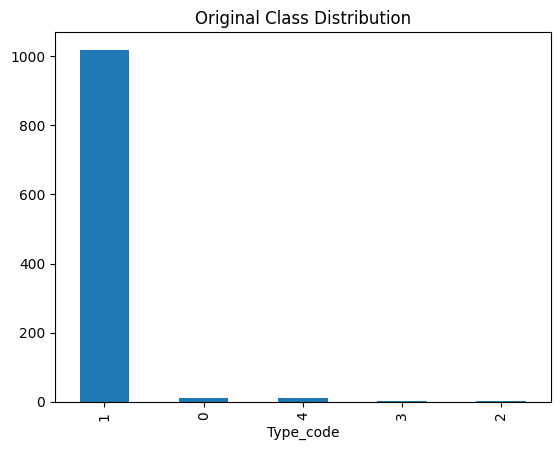

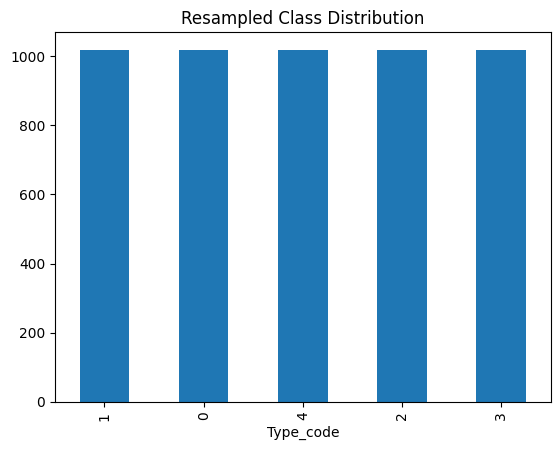

In [155]:
import matplotlib.pyplot as plt

# Check class distribution before and after resampling
print("Before resampling:")
print(y_train.value_counts())

print("\nAfter resampling:")
print(y_train_sm.value_counts())

# Visualize class distribution
y_train.value_counts().plot(kind='bar', title='Original Class Distribution')
plt.show()

y_train_sm.value_counts().plot(kind='bar', title='Resampled Class Distribution')
plt.show()
